# FTSE 100 stocks data collection and Exploratory Data Analysis
## 1. Introduction
Historical stock market data from Yahoo! Finance will be collected, analysed, transformed and visualised to gain insights into the stock returns for a selection of FTSE 100 companies from 2010-2019, as well as looking at the FTSE 100 Index itself.

## 2. Install/import libraries

In [1]:
!pip install yfinance
!pip install mplfinance

In [2]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## 3. Data collection
Download FTSE 100 stock data from Yahoo! Finance using yfinance library and store in a pandas dataframe. The stocks chosen are ULVR.L (Unilever), RSDB.L (Royal Dutch Shell), GSK.L (GlaxoSmithKline), AZN.L (AstraZeneca), HSBA.L (HSBC) and BP.L (BP) representing a selection of different industries - pharmaceuticals, oil and finance.

In [3]:
ftse100_stocks = yf.download("AZN.L GSK.L ULVR.L BP.L RDSB.L HSBA.L", start=datetime.datetime(2010, 1, 1), 
                                     end=datetime.datetime(2019, 12, 31), group_by='tickers')
ftse100_stocks.head(10)

[*********************100%***********************]  6 of 6 completed


HSBA.L                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2009-12-31  718.000000  719.000000  708.799988  708.799988  391.271088   
2010-01-04  713.299988  726.500000  713.000000  726.500000  401.041779   
2010-01-05  723.000000  747.200012  723.000000  737.000000  406.838013   
2010-01-06  737.099976  744.000000  734.200012  740.400024  408.714844   
2010-01-07  735.099976  742.400024  730.099976  736.500000  406.561920   
2010-01-08  740.200012  742.500000  729.000000  740.000000  408.494110   
2010-01-11  740.599976  746.099976  728.200012  730.000000  402.973785   
2010-01-12  733.299988  734.900024  720.500000  728.400024  402.090546   
2010-01-13  719.400024  724.500000  714.099976  717.700012  396.183960   
2010-01-14  720.799988  723.000000  711.799988  714.599976  394.472717   

                       GSK.L                          ...   AZN.L          \
              Volume    Open    High     Low   Close  ...     Low   Close   
Date                                                  ...                   
2009-12-31   4529917  1326.5  1326.5  1308.5  1319.5  ...  2892.0  2910.5   
2010-01-04  15139314  1325.0  1339.5  1318.5  1339.5  ...  2912.0  2941.0   
2010-01-05  27480532  1341.0  1341.0  1303.5  1307.0  ...  2901.0  2907.5   
2010-01-06  17203196  1305.5  1319.0  1294.5  1295.5  ...  2850.5  2875.0   
2010-01-07  26192632  1298.0  1307.0  1289.0  1293.5  ...  2879.0  2910.5   
2010-01-08  20725091  1293.5  1300.5  1277.0  1281.0  ...  2889.5  2908.5   
2010-01-11  21133364  1286.5  1294.5  1281.0  1288.0  ...  2901.0  2955.0   
2010-01-12  21007564  1285.5  1300.5  1282.0  1290.0  ...  2922.0  2928.5   
2010-01-13  23332228  1290.0  1299.0  1270.5  1275.0  ...  2912.0  2962.0   
2010-01-14  19050126  1274.0  1297.5  1266.0  1283.0  ...  2963.0  3020.0   

                                  ULVR.L                                       \
              Adj Close   Volume    Open    High     Low   Close    Adj Close   
Date                                                                            
2009-12-31  1709.245972   606488  1999.0  2006.0  1983.0  1994.0  1325.227173   
2010-01-04  1727.157837  2091679  1987.0  2006.0  1981.0  1996.0  1326.556396   
2010-01-05  1707.484009  2869739  1990.0  1997.0  1942.0  1953.0  1297.978027   
2010-01-06  1688.397705  3136541  1943.0  1955.0  1935.0  1955.0  1299.307129   
2010-01-07  1709.245972  3748200  1948.0  1961.0  1926.0  1931.0  1283.356567   
2010-01-08  1708.071411  2473846  1941.0  1948.0  1917.0  1936.0  1286.679932   
2010-01-11  1735.379517  4512854  1948.0  1954.0  1928.0  1930.0  1282.692383   
2010-01-12  1719.816772  4722582  1933.0  1938.0  1912.0  1929.0  1282.027588   
2010-01-13  1739.490112  6206108  1915.0  1943.0  1912.0  1931.0  1283.356567   
2010-01-14  1773.551758  5624164  1944.0  1955.0  1931.0  1945.0  1292.661133   

                     
             Volume  
Date                 
2009-12-31   393230  
2010-01-04  1764361  
2010-01-05  2304564  
2010-01-06  2694886  
2010-01-07  3156035  
2010-01-08  1894090  
2010-01-11  1243214  
2010-01-12  1398384  
2010-01-13  2297206  
2010-01-14  1997582  

[10 rows x 36 columns]

## 4. Exploratory Data Analysis

In [4]:
# Descriptive statistics showing distribution of the data

ftse100_stocks.describe()

HSBA.L                                                      \
              Open         High          Low        Close    Adj Close   
count  2526.000000  2526.000000  2526.000000  2526.000000  2526.000000   
mean    627.137007   632.356253   621.480855   626.776200   444.904152   
std      76.970671    76.981517    77.314137    77.086559    96.755423   
min     417.399994   420.299988   392.371002   416.149994   275.942719   
25%     581.124985   585.020996   575.500275   580.900024   370.008018   
50%     638.750000   644.087494   632.700012   638.149994   419.785828   
75%     678.875015   684.799988   673.799988   678.299988   541.783737   
max     796.000000   798.599976   790.500000   796.000000   656.803345   

                           GSK.L                                         ...  \
             Volume         Open         High          Low        Close  ...   
count  2.526000e+03  2526.000000  2526.000000  2526.000000  2526.000000  ...   
mean   2.675308e+07  1463.204632  1475.761347  1451.112096  1463.240818  ...   
std    1.245240e+07   151.139545   152.263975   150.730747   151.442386  ...   
min    0.000000e+00  1099.500000  1114.000000  1088.000000  1095.000000  ...   
25%    1.902963e+07  1350.524994  1363.043762  1338.000000  1351.125000  ...   
50%    2.412163e+07  1462.500000  1474.000000  1450.000000  1462.000000  ...   
75%    3.141863e+07  1583.375000  1596.327515  1571.500000  1582.199951  ...   
max    1.526299e+08  1809.599976  1850.400024  1806.000000  1818.800049  ...   

             AZN.L                                               ULVR.L  \
               Low        Close    Adj Close        Volume         Open   
count  2526.000000  2526.000000  2526.000000  2.526000e+03  2526.000000   
mean   4169.177204  4209.297988  3378.665964  2.654491e+06  3007.442313   
std    1181.805838  1195.882734  1394.017046  1.406287e+06   942.033190   
min    2454.000000  2543.500000  1663.632935  0.000000e+00  1688.000000   
25%    3033.125000  3062.875000  2025.192230  1.875569e+06  2156.500000   
50%    4153.250000  4197.750000  3331.792603  2.359694e+06  2752.000000   
75%    4863.125000  4909.000000  4269.613892  3.074329e+06  3991.875000   
max    7723.870117  7808.000000  7386.996094  2.688081e+07  5333.000000   

                                                                         
              High          Low        Close    Adj Close        Volume  
count  2526.000000  2526.000000  2526.000000  2526.000000  2.526000e+03  
mean   3031.307653  2984.036126  3008.093969  2469.207999  2.630973e+06  
std     948.778536   935.927728   942.364842   999.157704  1.197818e+06  
min    1694.000000  1662.000000  1688.000000  1143.794556  0.000000e+00  
25%    2173.000000  2138.000000  2155.000000  1568.679077  1.901546e+06  
50%    2777.000000  2727.500000  2754.000000  2135.105713  2.405236e+06  
75%    4016.750000  3949.375000  3987.625000  3460.077454  3.074246e+06  
max    5333.000000  5264.000000  5324.000000  4930.354980  2.125112e+07  

[8 rows x 36 columns]

In [5]:
# Concise summary of the dataframe to check for missing values and data types

ftse100_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2526 entries, 2009-12-31 to 2019-12-30
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (HSBA.L, Open)       2526 non-null   float64
 1   (HSBA.L, High)       2526 non-null   float64
 2   (HSBA.L, Low)        2526 non-null   float64
 3   (HSBA.L, Close)      2526 non-null   float64
 4   (HSBA.L, Adj Close)  2526 non-null   float64
 5   (HSBA.L, Volume)     2526 non-null   int64  
 6   (GSK.L, Open)        2526 non-null   float64
 7   (GSK.L, High)        2526 non-null   float64
 8   (GSK.L, Low)         2526 non-null   float64
 9   (GSK.L, Close)       2526 non-null   float64
 10  (GSK.L, Adj Close)   2526 non-null   float64
 11  (GSK.L, Volume)      2526 non-null   int64  
 12  (RDSB.L, Open)       2526 non-null   float64
 13  (RDSB.L, High)       2526 non-null   float64
 14  (RDSB.L, Low)        2526 non-null   float64
 15  (RDSB.L, Close)     

In [6]:
# Number of rows indicates number of trading days

ftse100_stocks.shape

(2526, 36)

We will use the Adjusted Close price to take into account all corporate actions, such as stock splits and dividends, to give a more accurate reflection of the true value of the stock and present a coherent picture of returns.

In [7]:
# Dataframe to contain Adjusted Close price for each company's stock

adj_close = pd.DataFrame()

In [8]:
tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'RDSB.L', 'HSBA.L']
for ticker in tickers:
    adj_close[ticker] = ftse100_stocks[ticker]['Adj Close']

adj_close

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2009-12-31,1709.245972,713.278442,1325.227173,309.201630,932.739746,391.271088
2010-01-04,1727.157837,724.089783,1326.556396,316.210114,958.999512,401.041779
2010-01-05,1707.484009,706.521240,1297.978027,319.559784,969.812500,406.838013
2010-01-06,1688.397705,700.304504,1299.307129,319.199158,957.197205,408.714844
2010-01-07,1709.245972,699.223450,1283.356567,321.208984,955.137756,406.561920
...,...,...,...,...,...,...
2019-12-20,7386.996094,1629.743774,4075.441895,421.768616,2041.041016,556.402283
2019-12-23,7328.338867,1631.361572,4133.302246,425.246765,2064.343750,555.289795
2019-12-24,7298.064453,1633.698608,4096.438965,424.072937,2079.422119,555.660645


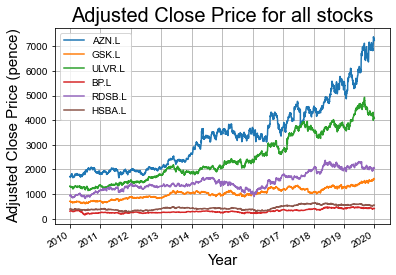

In [9]:
# Plot Adjusted Close price for all stocks

adj_close.plot(grid = True)
sns.set(rc={'figure.figsize' : (15, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);

This chart shows the absolute price rather than relative change which we are more concerned with when trading. AZN.L and ULVR.L stocks are far more expensive than BP.L and HSBA.L making the latter appear much less volatile than they truly are.

In [10]:
# lambda function to calculate min and max Adjusted Close price 

adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
min,1663.632935,608.309204,1143.794556,158.433258,824.800049,275.942719
max,7386.996094,1634.777222,4930.354980,483.210205,2371.672119,656.803345


One solution would be to use two different scales when plotting the data. One scale will be used by the BP.L and HSBA.L stocks, and the other by the more expensive stocks.

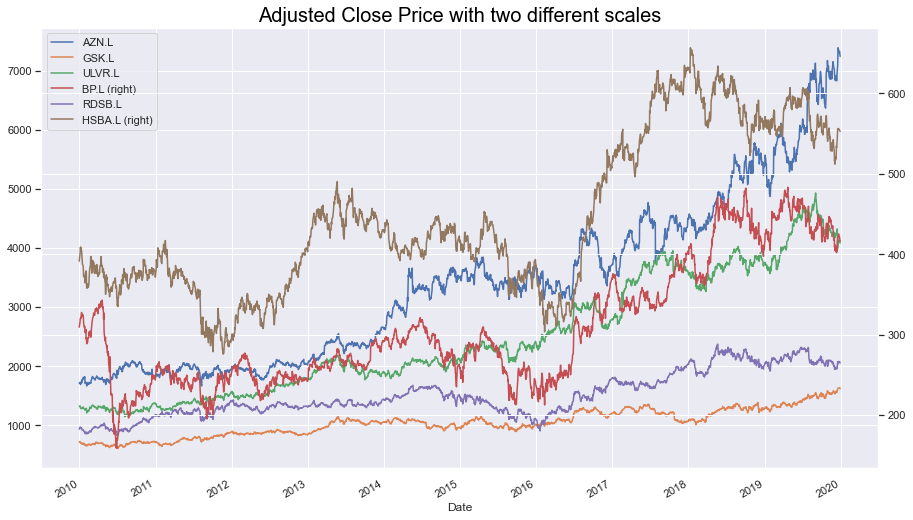

In [11]:
# Plot BP.L and HSBA.L data on a secondary y-axis

adj_close.plot(secondary_y = ["BP.L", "HSBA.L"], grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price with two different scales', color = 'black', fontsize = 20);

## 5. Data transformation
A better solution would be to plot the stocks' returns, which requires transforming the data into something more useful for our purposes.

### 5.1 Consider stocks' returns since beginning of the time period


 by applying a lambda function to each column in the adj_close dataframe and return a dataframe with the result.

In [12]:
# Transform data using lambda function to plot stocks' returns

returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2009-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-04,1.010479,1.015157,1.001003,1.022666,1.028153,1.024972
2010-01-05,0.998969,0.990527,0.979438,1.033500,1.039746,1.039786
2010-01-06,0.987803,0.981811,0.980441,1.032333,1.026221,1.044582
2010-01-07,1.000000,0.980295,0.968405,1.038833,1.024013,1.039080


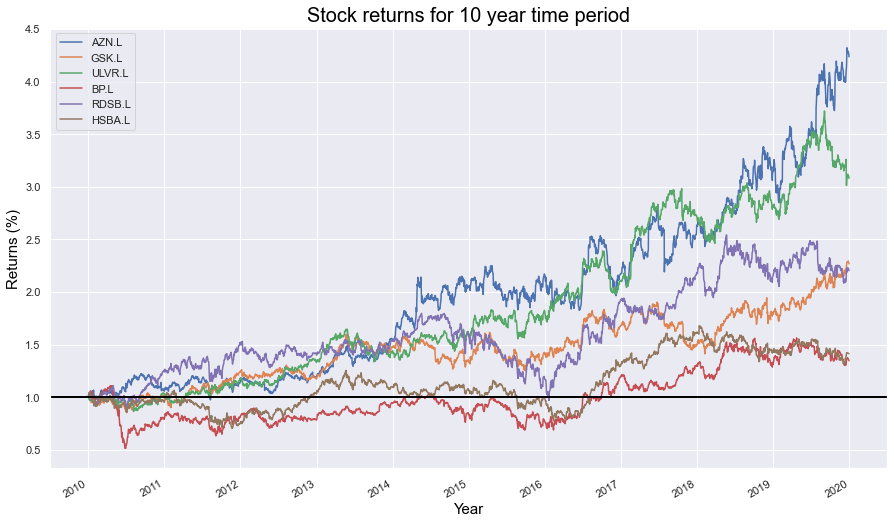

In [13]:
# Plot to show how profitable each stock was throughout the time period

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize' : (15, 9)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

This plot is more useful than the previous one as we can see how profitable each stock was since the beginning of the period and which are most closely correlated. The overall trend of the stocks is much more apparent.

In [14]:
# Create dataframe to contain returns for each company's stock to plot the change of each stock per day

returns = pd.DataFrame()

## 5.2 Percentage change
Another transformation is to calculate the daily percentage change directly using the pandas 'pct_change()' method which computes the percentage change from the previous row by default.


In [15]:
# pandas pct_change() method on the Adj Close column to create a column representing return value

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'RDSB.L', 'HSBA.L']
for ticker in tickers:
    returns[ticker] = ftse100_stocks[ticker]['Adj Close'].pct_change() * 100

returns

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,1.047940,1.515725,0.100302,2.266639,2.815337,2.497167
2010-01-05,-1.139087,-2.426293,-2.154327,1.059318,1.127528,1.445294
2010-01-06,-1.117803,-0.879908,0.102398,-0.112851,-1.300797,0.461321
2010-01-07,1.234796,-0.154369,-1.227621,0.629647,-0.215154,-0.526754
...,...,...,...,...,...,...
2019-12-20,2.279272,0.376436,0.714941,0.289457,-1.716172,0.033337
2019-12-23,-0.794061,0.099267,1.419732,0.824658,1.141708,-0.199943
2019-12-24,-0.413114,0.143257,-0.891860,-0.276035,0.730419,0.066785


In [16]:
# Clean up the data by dropping the first value which becomes a 'NaN' as there is no price change from the day before.

returns.dropna(inplace=True)
returns.head()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-04,1.047940,1.515725,0.100302,2.266639,2.815337,2.497167
2010-01-05,-1.139087,-2.426293,-2.154327,1.059318,1.127528,1.445294
2010-01-06,-1.117803,-0.879908,0.102398,-0.112851,-1.300797,0.461321
2010-01-07,1.234796,-0.154369,-1.227621,0.629647,-0.215154,-0.526754
2010-01-08,-0.068718,-0.966369,0.258959,-0.256694,-1.078147,0.475251


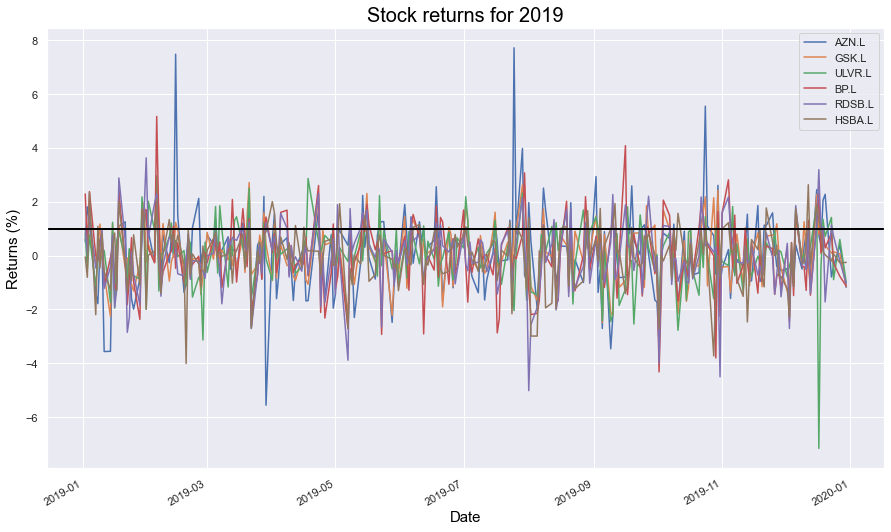

In [17]:
# Plot returns for 2019

returns.loc['2019-01-01':'2019-12-31'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2019', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

The above plot for 2019 shows changes between days, which is what more advanced methods consider when modelling stock behaviour.

## 5.3 Log differences
Another way to model the growth of a stock is with log differences. Taking the natural log of the prices will give an approximation to the true daily returns.


Using logs, or summarising changes in terms of continuous compounding, has a number of advantages over looking at simple percent changes. For example, if your portfolio goes up by 50% (say from £100 to £150) and then declines by 50% (say from £150 to £75), you’re not back where you started. If you calculate your average percentage return (in this case, 0%), that’s not a particularly useful summary of the fact that you actually ended up 25% below where you started.

By contrast, if your portfolio goes up in logarithmic terms by 0.5, and then falls in logarithmic terms by 0.5, you are exactly back where you started. The average log return on your portfolio is exactly the same number as the change in log price between the time you bought it and the time you sold it, divided by the number of years that you held it.

In [18]:
# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.010425,0.015044,0.001003,0.022413,0.027764,0.024665
2010-01-05,-0.011456,-0.024562,-0.021779,0.010537,0.011212,0.014349
2010-01-06,-0.011241,-0.008838,0.001023,-0.001129,-0.013093,0.004603
2010-01-07,0.012272,-0.001545,-0.012352,0.006277,-0.002154,-0.005281


In [19]:
# Clean up the data by dropping NaNs

stock_change.dropna(inplace=True)
stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-04,0.010425,0.015044,0.001003,0.022413,0.027764,0.024665
2010-01-05,-0.011456,-0.024562,-0.021779,0.010537,0.011212,0.014349
2010-01-06,-0.011241,-0.008838,0.001023,-0.001129,-0.013093,0.004603
2010-01-07,0.012272,-0.001545,-0.012352,0.006277,-0.002154,-0.005281
2010-01-08,-0.000687,-0.009711,0.002586,-0.002570,-0.010840,0.004741


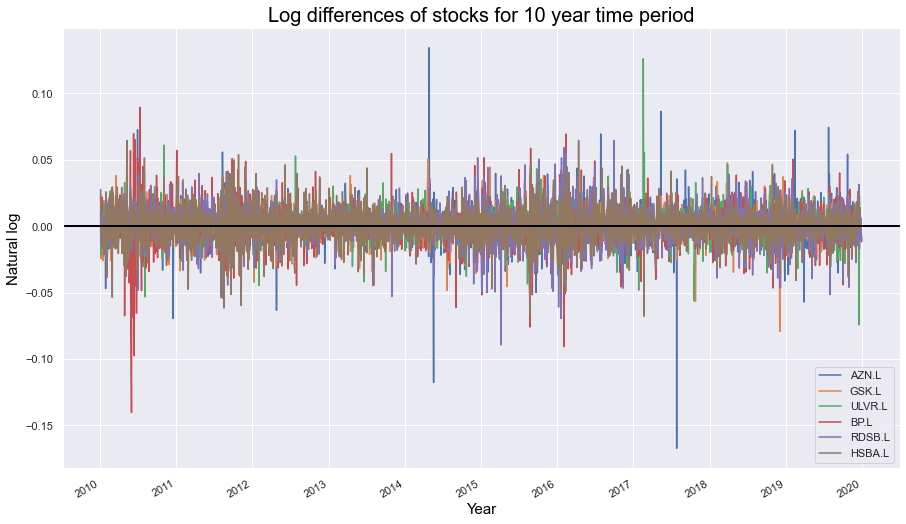

In [20]:
# Plot log differences for 2010-2019

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

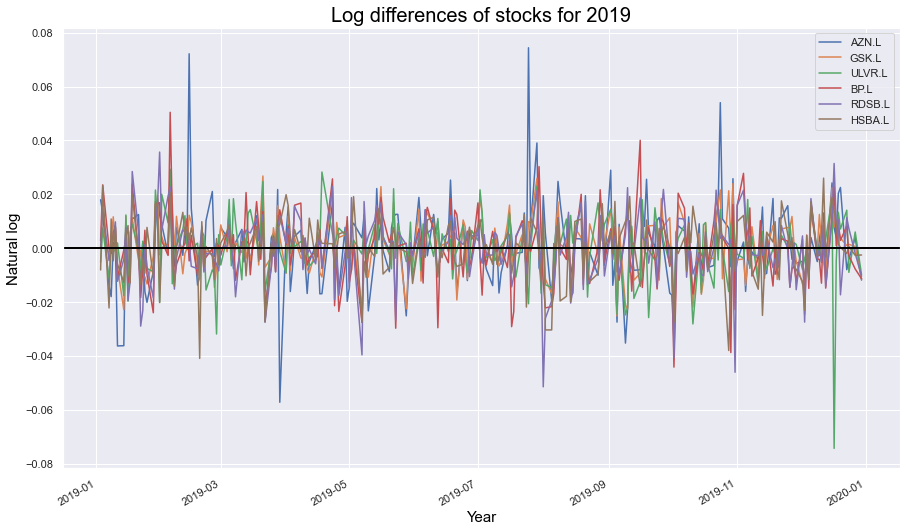

In [21]:
# Plot log differences for 2019

stock_change.loc['2019-01-01':'2019-12-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2019', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

## 5.4 Annualise returns
We can annualise our returns, thus computing the annual percentage rate (APR). This helps us keep returns on a common time scale.

In [22]:
# annualise returns

stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr


,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-04,262.706665,379.096893,25.263327,564.815706,699.661541,621.557226
2010-01-05,-288.697287,-618.965632,-548.823716,265.544109,282.547141,361.607279
2010-01-06,-283.272480,-222.718078,25.791055,-28.454496,-329.951619,115.985679
2010-01-07,309.263102,-38.931103,-311.274954,158.173498,-54.277223,-133.092964
2010-01-08,-17.322902,-244.709351,65.173258,-64.770033,-273.168321,119.479584
...,...,...,...,...,...,...
2019-12-20,567.928628,94.683830,179.524176,72.837827,-436.229322,8.399469
2019-12-23,-200.901976,25.002878,355.256537,206.961668,286.080475,-50.436092
2019-12-24,-104.320428,36.074876,-225.757014,-69.656897,183.396742,16.824172


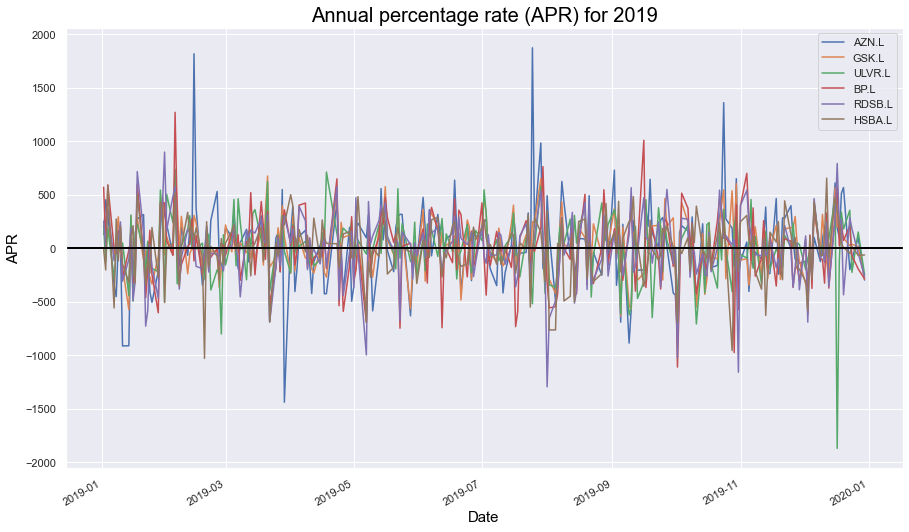

In [23]:
# Plot annualised returns for 2019

stock_change_apr['2019-01-01':'2019-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate (APR) for 2019', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15);

## 6. Calculating statistical data for returns
### 6.1 Calculate minimum and maximum returns for 2010-2019

In [24]:
# Date of worst single day returns

returns.idxmin()

AZN.L    2017-07-27
GSK.L    2018-12-03
ULVR.L   2019-12-17
BP.L     2010-06-01
RDSB.L   2015-04-08
HSBA.L   2017-02-21
dtype: datetime64[ns]

In [25]:
# Date of best single day returns

returns.idxmax()

AZN.L    2014-04-28
GSK.L    2014-04-22
ULVR.L   2017-02-17
BP.L     2010-07-12
RDSB.L   2016-09-29
HSBA.L   2010-05-10
dtype: datetime64[ns]

There may be some significance in the two pharmaceutical stocks' best day being within a few days of each other in the same month and year. Also, BP's largest drop and biggest gain were in consecutive months in the same year.

## 6.2 Mean
The mean is a statistical indicator that can be used to gauge the performance of a company’s stock price over a particular time period. Here it is the average of the returns, and also determines the standard deviation and variance.

In [26]:
# Compute mean to give a representation of the average expected returns 

returns.mean()

AZN.L     0.066432
GSK.L     0.038631
ULVR.L    0.051221
BP.L      0.023282
RDSB.L    0.040652
HSBA.L    0.022101
dtype: float64

## 6.3 Variance
The variance measures variability from the average or mean. It correlates to the size of the overall range of the data set, being greater when there is a wider range and narrower when there is a narrower range.

It is calculated by taking the differences between each value in the data set and the mean, squaring the differences to make them positive, and dividing the sum of the squares by the number of values in the data set.

The calculation of variance uses squares because it weighs outliers more heavily than data closer to the mean. This calculation also prevents differences above the mean from cancelling out those below, which would result in a variance of zero.

In [27]:
# Compute variance to give a measure of the dispersion of returns around the mean

returns.var()

AZN.L     1.844517
GSK.L     1.246122
ULVR.L    1.338123
BP.L      2.298929
RDSB.L    1.875531
HSBA.L    1.683347
dtype: float64

## 6.4 Standard deviation
Standard deviation (σ) is often used by investors to measure the risk of a stock or a stock portfolio, the basic idea being that it is a measure of volatility. It looks at how far from the mean a group of values is, and is calculated as the square root of variance by figuring out the variation between each data point relative to the mean. Essentially, it is the square root of the average squared deviation from the mean, and the more spread out the values are, the higher the standard deviation.

In [28]:
# Compute the standard deviation to describe dispersion, or variability, in the stock returns from the mean 
 
returns.std()

AZN.L     1.358130
GSK.L     1.116298
ULVR.L    1.156773
BP.L      1.516222
RDSB.L    1.369500
HSBA.L    1.297439
dtype: float64

However, in order for standard deviation to be an accurate measure of risk, an assumption has to be made that investment performance data follows a normal distribution and has a skewness of 0.

## 6.5 Skewness
Financial returns are typically positively or negatively skewed and warp the look of the normally distributed bell-shaped curve distorting the accuracy of standard deviation as a measure of risk. Skewness essentially measures the relative size of the two tails of the distribution.

In [29]:
# Compute skewness to measure the asymmetry of the data around its mean

returns.skew()

AZN.L    -0.104826
GSK.L    -0.139325
ULVR.L    0.468872
BP.L     -0.220370
RDSB.L   -0.138206
HSBA.L    0.010989
dtype: float64

Here the data looks fairly symmetrical as the skewness for all of the stock returns lies between -0.5 and 0.5 with ULVR.L being the most skewed. With a measure of 0.46 it is slightly positively skewed.

## 6.6 Kurtosis
Kurtosis is a measure of the combined sizes of the two tails - not the peakedness or flatness. It measures the tail-heaviness of the distribution, or amount of probability in the tails.

In [30]:
# Compute kurtosis as a measure of the combined sizes of the two tails.

returns.kurt()

AZN.L     15.974187
GSK.L      2.282808
ULVR.L     9.520265
BP.L       5.548204
RDSB.L     2.671004
HSBA.L     2.686060
dtype: float64

A normal distribution has a kurtosis of 3, however the pandas kurtosis function makes it a uniform zero and in this case the measure is called excess kurtosis.

It appears that AZN.L has significant excess kurtosis followed by ULVR.L.

## 7. Data visualisation of returns
### 7.1 Pairplot
Plot pairwise relationships of the stocks with the pairplot() function which uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal.

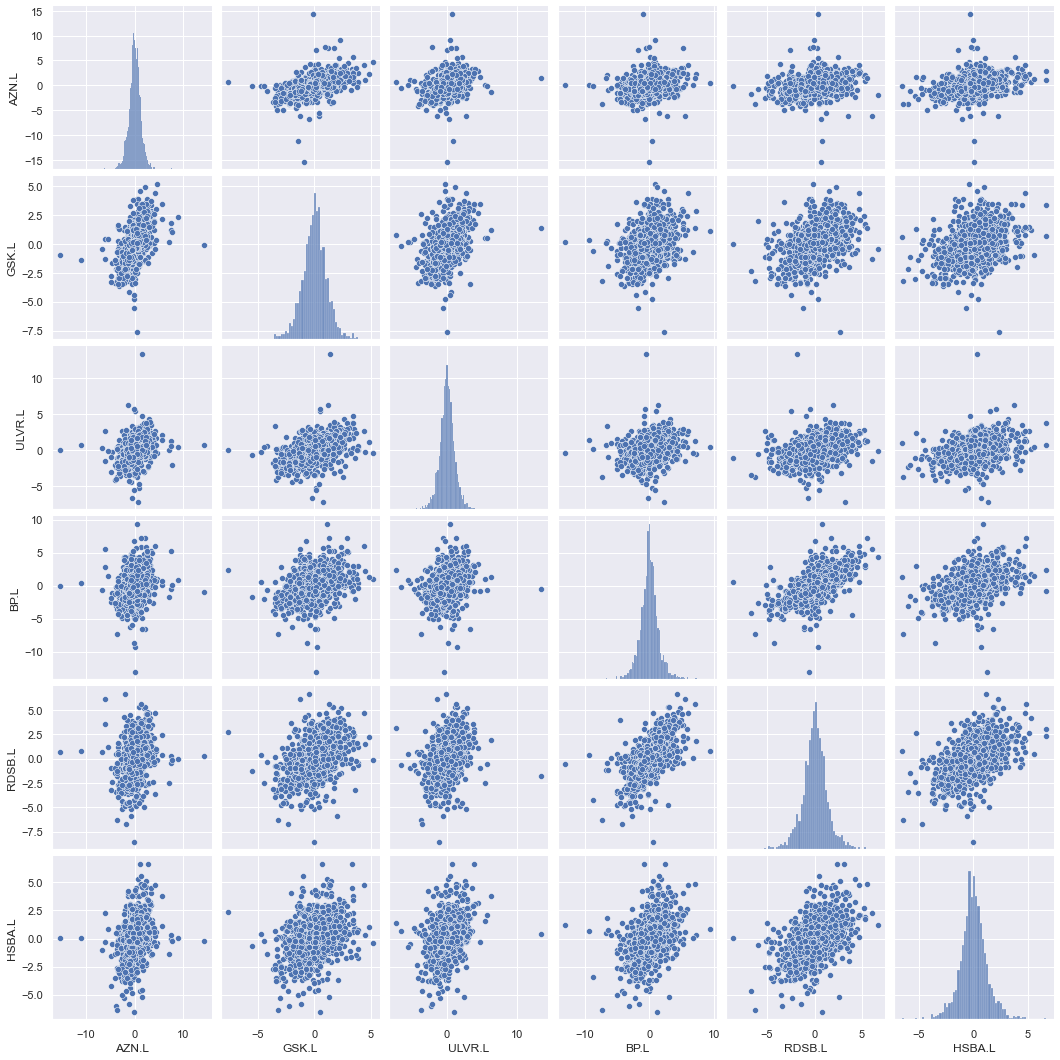

In [31]:
# Pairplot of returns dataframe 

sns.pairplot(returns);

## 7.2 Box plots
Box and whisker plots are a standardised way of displaying the distribution of data based on a five number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum), with a line going through the box at the median.

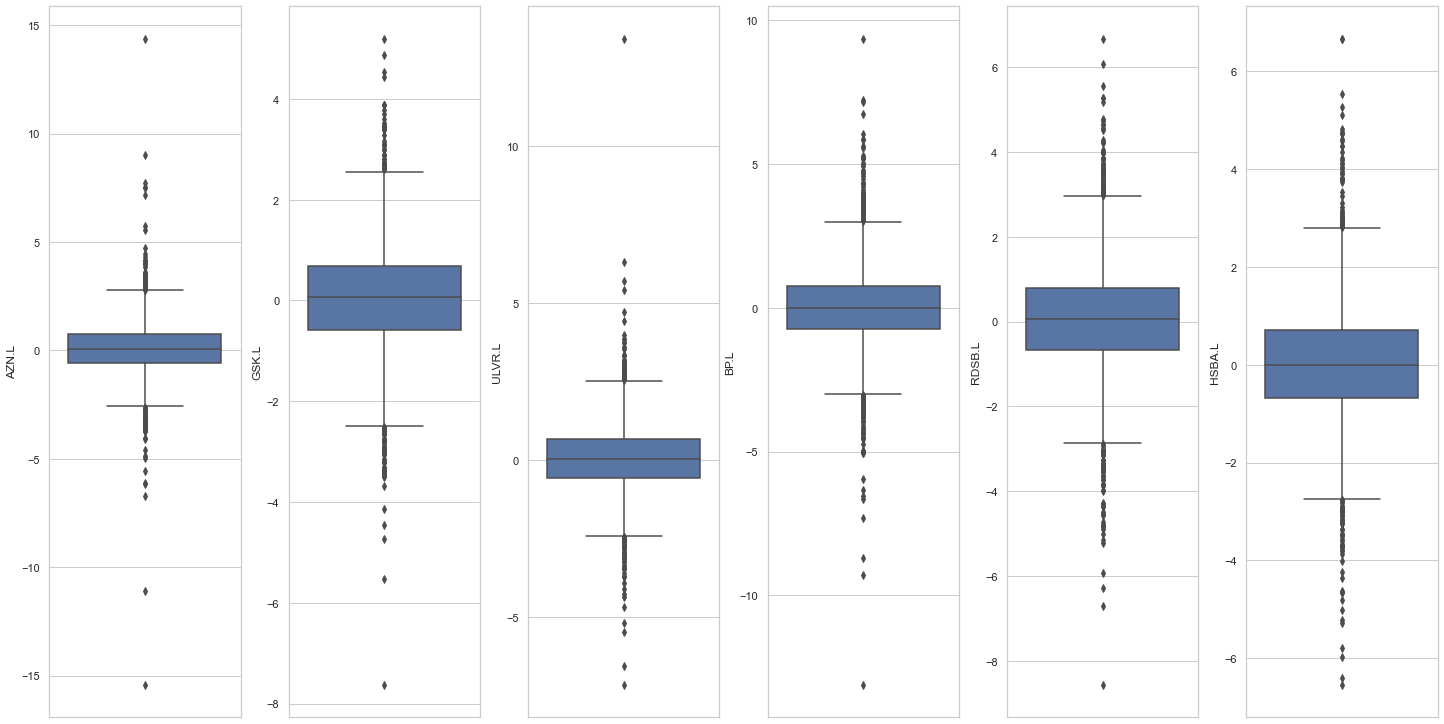

In [32]:
# Boxplots showing distribution of the returns data over the time period 

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

By comparing the interquartile ranges (box lengths), we can compare dispersion. If two boxes do not overlap with one another then there is a difference between the two groups. We can see that AZN.L and ULVR. do not overlap with the other stocks.

If we compare the respective medians and the median line of one box lies outside of another entirely, then there is likely to be a difference between the two groups. Again we can see that AZN.L and ULVR. are different.

Whiskers show how big a range there is between maximum and minimum values, with larger ranges indicating wider distribution, that is, more scattered data.

We can look for signs of skewness suggesting that data may not be normally distributed. Skewed data show a lopsided box plot, where the median cuts the box into two unequal pieces. If the longer part of the box is above the median, the data is said to be positively skewed. If the longer part is or below the median, the data is negatively skewed.

Any values in the data set that are more extreme than the adjacent values are plotted as separate points on the box plot. This identifies them as potential outliers.

## 7.3 Distribution plots
Distribution plots depict the variation in the data distribution. Here the distribution of returns is shown by a histogram and a line in combination with it which is the kernel density estimate.

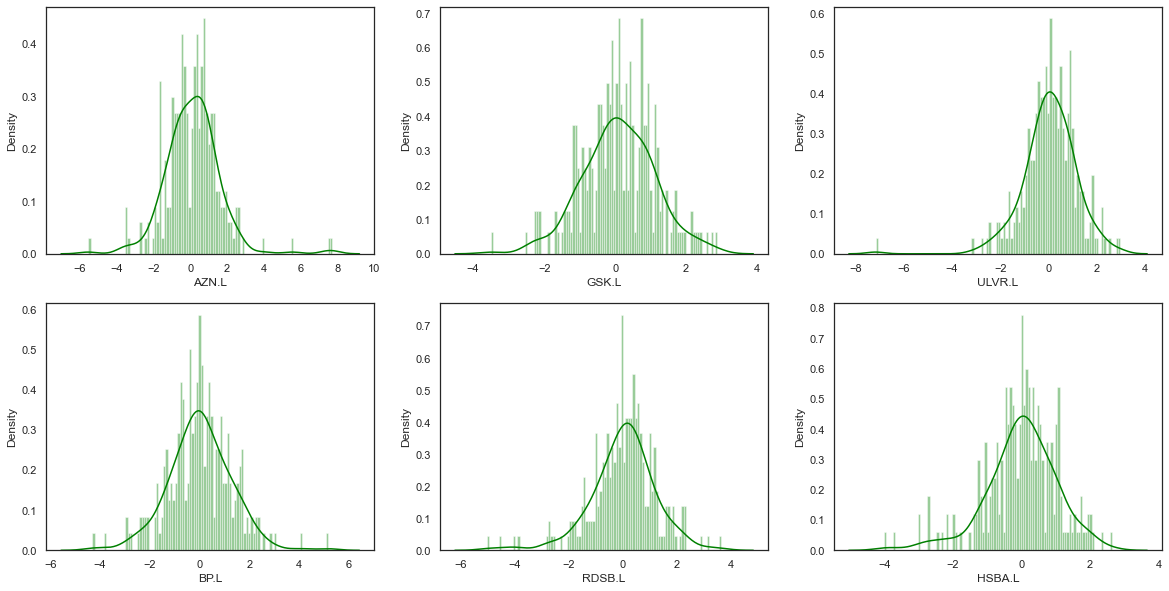

In [33]:
# Distribution plots showing the data for returns for 2019 

sns.set_style("white")

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'RDSB.L', 'HSBA.L']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.distplot(returns.loc['2019-01-01':'2019-12-31'][ticker], color='green', bins=100, ax=axs[index])
    index += 1

## 7.4 Covariance
Covariance indicates the direction of the linear relationship between variables. It is a measure of the relationship between two stocks' returns and can help determine if stocks' returns tend to move with or against each other.

Investors might even be able to select stocks that complement each other in terms of price movement. This can help reduce the overall risk and increase the overall potential return of a portfolio.

In [34]:
# Covariance matrix to show direction of relationship between stocks' returns

returns.cov() 

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
AZN.L,1.844517,0.823222,0.607252,0.579838,0.583216,0.619745
GSK.L,0.823222,1.246122,0.612529,0.609068,0.640752,0.556383
ULVR.L,0.607252,0.612529,1.338123,0.504214,0.594796,0.580094
BP.L,0.579838,0.609068,0.504214,2.298929,1.433718,0.882811
RDSB.L,0.583216,0.640752,0.594796,1.433718,1.875531,0.902693
HSBA.L,0.619745,0.556383,0.580094,0.882811,0.902693,1.683347


## 7.5 Correlation
Correlation measures both the strength and direction of the linear relationship between two variables, or the degree to which two variables move in relation to each other, and is a function of the covariance.

In [35]:
# Correlation matrix to show strength and direction of relationship between stocks' returns

returns.corr()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
AZN.L,1.000000,0.542994,0.386526,0.281580,0.313564,0.351710
GSK.L,0.542994,1.000000,0.474349,0.359851,0.419129,0.384155
ULVR.L,0.386526,0.474349,1.000000,0.287477,0.375455,0.386512
BP.L,0.281580,0.359851,0.287477,1.000000,0.690460,0.448764
RDSB.L,0.313564,0.419129,0.375455,0.690460,1.000000,0.508032
HSBA.L,0.351710,0.384155,0.386512,0.448764,0.508032,1.000000


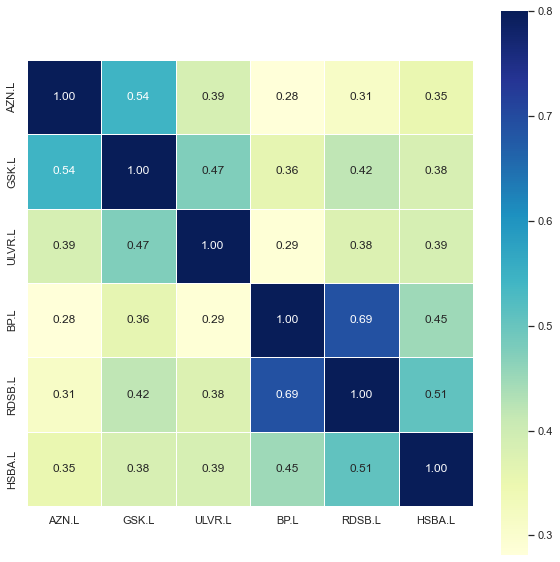

In [36]:
# The heatmap clearly shows the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

The strongest correlation is between RDSB and BP (oil stocks) followed by GSK and AZN (pharmaceutical stocks).

## 8. FTSE 100 Index data
Finally, we will visualise data from the launch of the FTSE 100 Index in January 1984 to the end of 2020 as being representative of the UK stock market.

In [37]:
# Download FTSE 100 historical stock data from Yahoo! Finance for 1984-2020

ftse100_idx_to_2020 = yf.download("^FTSE", start=datetime.datetime(1984, 1, 1), 
                                     end=datetime.datetime(2021, 1, 1))
ftse100_idx_to_2020

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-01-03,997.500000,1001.400024,997.500000,997.500000,997.500000,0
1984-01-04,997.500000,999.500000,993.299988,998.599976,998.599976,0
1984-01-05,1007.099976,1015.799988,1007.099976,1015.799988,1015.799988,0
1984-01-06,1019.000000,1029.300049,1019.000000,1029.000000,1029.000000,0
1984-01-09,1030.599976,1035.400024,1030.599976,1034.599976,1034.599976,0
...,...,...,...,...,...,...
2020-12-23,6453.200195,6497.299805,6431.200195,6495.799805,6495.799805,807695400
2020-12-24,6495.799805,6530.299805,6479.600098,6502.100098,6502.100098,477470700
2020-12-29,6502.100098,6676.600098,6502.100098,6602.700195,6602.700195,824116800


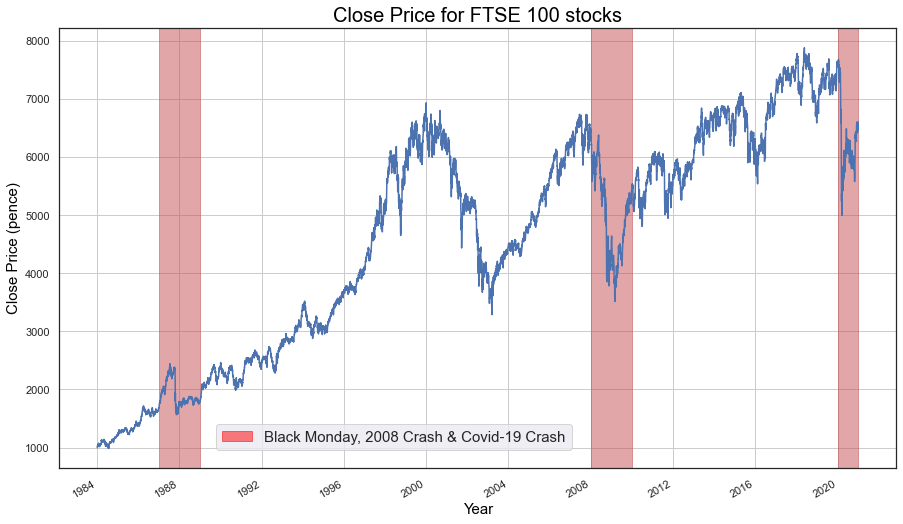

In [38]:
def ftse100_to_2020_plot():
    ftse100_idx_to_2020['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.axvspan('1987','1989',color='r',alpha=.5)
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2021',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday, 2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for FTSE 100 stocks', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price (pence)', color = 'black', fontsize = 15)
    plt.show();

ftse100_to_2020_plot()

The plot clearly shows the major market events of Black Monday in 1987, the 2008 Global Financial Crisis, and the Coronavirus Crash in 2020 and appears to confirm the overall upward trend of stocks from 2010-2019 evident in the selection of stocks analysed.

In [39]:
ftse100_idx_to_2020.to_pickle("ftse100_idx_to_2020.pkl")